<a href="https://colab.research.google.com/github/phanindra547/TwitterAnalysis/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

snscrape is a scraper for social networking services(SNS).It scrapes user profiles,hastags and data from the user post

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We know that user-generated content on the social media is often dirty.For this we use clean-text for the scraped data to get normalized text representation

In [ ]:
!pip install clean-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Pandas is an open-source python library that allows to perform data manipulation and analysis.

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We imported some modules which are useful for the model.

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
from cleantext import clean
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
plt. style.use('fivethirtyeight')

Scipy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 **Data Scraping**

In this block we use hashtag "vocalforlocal" with some constraints.They are  language of tweet is english and  with particular date as selected.


In [ ]:

hashtag="(@#vocalforlocal) lang:en until:2022-11-28 since:2020-08-09"
data=[]
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(hashtag).get_items():
  if(len(data)==limit):
    break
  else:
    data.append([tweet.content])

**Data Cleaning**

 We used clean text to remove the emojis,hashtags and mentions which are tweeted by the user.

In [ ]:
from cleantext import clean
for i in range(len(data)):
    data[i]=clean(data[i],no_emoji=True)
    data[i]=re.sub("(#\S+)","",data[i])
    data[i]=re.sub("(@\S+)","",data[i])

After cleaning the data we converted the array into dataframe named as df.And we named the users tweets as title Tweet

In [ ]:
 df=pd.DataFrame(data,columns=['Tweet'])
print(df)

                                                  Tweet
0     ['be careful of vocal demands!\n              ...
1     [' yes...n since then i stopped buying from ba...
2     ['thank you for such kind review, . bhai.\nord...
3     ['find harsh ro services @ greater noida west\...
4     ["*nexon* perfect family companion.\nsunshine,...
...                                                 ...
4995  ["\nbe local . it's not difference.\nif we dep...
4996  ['you are an amazing youth leaders be \n  http...
4997  ['a confluence of "craft, cuisine and culture"...
4998  ['heavy duty design easy to install and minima...
4999  ['pure handspun ikkat cotton single bedsheet i...

[5000 rows x 1 columns]


After removing the hashtags and other.Here we have to remove some links which are tweeted by user.For this we replaced the links with no space('').so the links are removed from dataframe

In [ ]:
df['Tweet']=df['Tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')

<ipython-input-95-fc1563a71860>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet']=df['Tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','')


In [ ]:
df['Tweet']=df['Tweet'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
df['Tweet']=df['Tweet'].str.replace(r'\n','')

<ipython-input-96-8d2ed10c9453>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet']=df['Tweet'].str.replace(r"[\"\'\|\?\=\.\@\#\*\,]", '')
<ipython-input-96-8d2ed10c9453>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet']=df['Tweet'].str.replace(r'\n','')


Here we used head method to get the top 5 Tweets from the database.As we see here the data is clear without any hashtags,mentions and links.

In [ ]:
df.head()

,Tweet
0,[be careful of vocal demands!
1,[ yesn since then i stopped buying from bata a...
2,[thank you for such kind review bhaiorder our...
3,[find harsh ro services greater noida west
4,[nexon perfect family companionsunshine trees ...


We use drop_duplicates function to remove the duplicates rows from all the columns of the dataframe.Inplace is used to modify the dataframe rather than creating a new one.

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(4532, 1)

The dropna() method is used to remove the rows that contains NULL values.This method returns a dataframe object unless the inplace parameter is set to True.

In [ ]:

df.dropna(inplace = True)
df.head()

,Tweet
0,[be careful of vocal demands!
1,[ yesn since then i stopped buying from bata a...
2,[thank you for such kind review bhaiorder our...
3,[find harsh ro services greater noida west
4,[nexon perfect family companionsunshine trees ...


The index function returns the index of the information in a dataframe.The index information contains the labels of the rows.

In [ ]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', length=4532)

As we know about the drop_duplicates() above.And the display function is used to show the unique elements from the dataframe.And shape is used the know the dimensions of the dataframe

In [ ]:

display(df.drop_duplicates())
df.shape

,Tweet
0,[be careful of vocal demands!
1,[ yesn since then i stopped buying from bata a...
2,[thank you for such kind review bhaiorder our...
3,[find harsh ro services greater noida west
4,[nexon perfect family companionsunshine trees ...
...,...
4995,[be local its not differenceif we depend on o...
4996,[you are an amazing youth leaders be
4997,[a confluence of craft cuisine and culture hun...
4998,[heavy duty design easy to install and minimal...


(4532, 1)

The isnull() method returns a dataframe object where all the values are replaced with True for null values and otherwise False.

In [ ]:
df.isnull()

,Tweet
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


The given below method checks all the values of the dataset returns True if it contains null valuse or else returns False for other

In [ ]:
df.isnull().any().any()

False

The df.isnull().sum() method is used to get the count of null values in a column

In [ ]:
df.isnull().sum()

Tweet    0
dtype: int64

The df.isnull().sum().sum() method is used to get the count of all null values in a dataset

In [ ]:
df.isnull().sum().sum()

0

In the below block we create two functions getSubjectivity and getPloarity for sentiment analysis by using the TextBlob 

In [ ]:
def getSubjectivity(data):
  return TextBlob(data).sentiment.subjectivity
def getPloarity(data):
  return TextBlob(data).sentiment.polarity
df['subjective']=df['Tweet'].apply(getSubjectivity)
df['Polarity']=df['Tweet'].apply(getPloarity)
df


,Tweet,subjective,Polarity
0,[be careful of vocal demands!,1.000000,-0.125000
1,[ yesn since then i stopped buying from bata a...,0.488333,-0.075000
2,[thank you for such kind review bhaiorder our...,0.350000,0.150000
3,[find harsh ro services greater noida west,0.600000,0.150000
4,[nexon perfect family companionsunshine trees ...,1.000000,1.000000
...,...,...,...
4995,[be local its not differenceif we depend on o...,0.000000,0.000000
4996,[you are an amazing youth leaders be,0.900000,0.600000
4997,[a confluence of craft cuisine and culture hun...,0.000000,0.000000
4998,[heavy duty design easy to install and minimal...,0.558333,0.283333


**Sentiment Analysis**

Converting the subjective and Polarity into numpy to plot the graph.

In [ ]:

subjectivity=df['subjective'].to_numpy()
polarity=df['Polarity'].to_numpy()

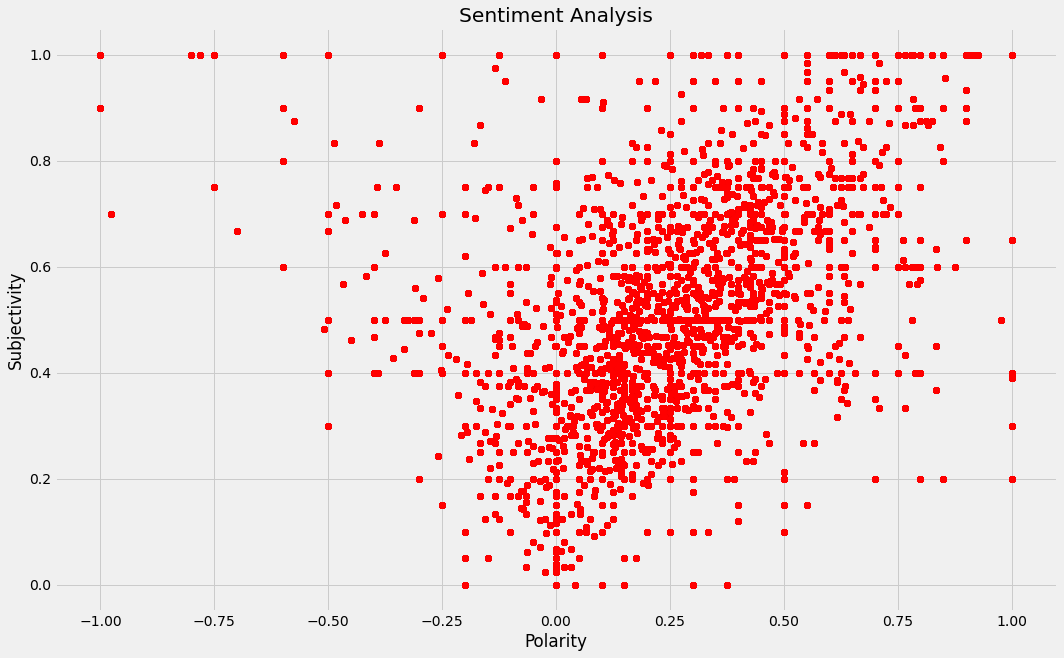

In [ ]:
plt.figure(figsize=(16,10))
for i in range(0,len(subjectivity)):
  plt.scatter(polarity,subjectivity,color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Here we plot the words by using the WordCloud.In this WordCloud  the word which have greater size is the  word most repeated in tweets.

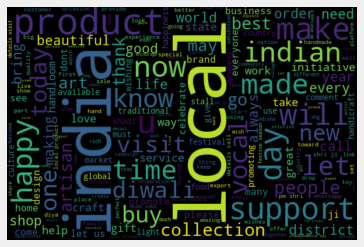

In [ ]:
#plot the word cloud
words=' '.join([twt for twt in df['Tweet']])
wordCloud = WordCloud(width=600,height=400,random_state=23,max_font_size=120).generate(words)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

Here we create a function getAnalysis to compute whether the tweet is negative,neutral and positive.

In [ ]:

def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweet,subjective,Polarity,Analysis
0,[be careful of vocal demands!,1.000000,-0.125000,Negative
1,[ yesn since then i stopped buying from bata a...,0.488333,-0.075000,Negative
2,[thank you for such kind review bhaiorder our...,0.350000,0.150000,Positive
3,[find harsh ro services greater noida west,0.600000,0.150000,Positive
4,[nexon perfect family companionsunshine trees ...,1.000000,1.000000,Positive
...,...,...,...,...
4995,[be local its not differenceif we depend on o...,0.000000,0.000000,Neutral
4996,[you are an amazing youth leaders be,0.900000,0.600000,Positive
4997,[a confluence of craft cuisine and culture hun...,0.000000,0.000000,Neutral
4998,[heavy duty design easy to install and minimal...,0.558333,0.283333,Positive


From the below three blocks of code we get the percentage of positive,negative and neutral tweets.

In [ ]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
round((ptweets.shape[0]/df.shape[0])*100,1)

59.1

In [ ]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
round((ntweets.shape[0]/df.shape[0])*100,1)

7.5

In [ ]:
nutweets = df[df.Analysis == 'Neutral']
nutweets = nutweets['Tweet']
round((nutweets.shape[0]/df.shape[0])*100,1)

33.4

**Plotting  Graph**

The given below pie chart represents the percentages of positive ,negative and neutral

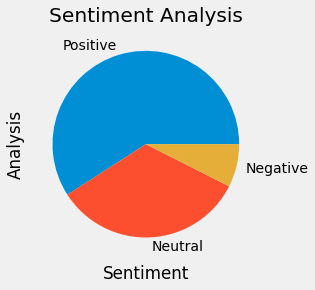

In [ ]:
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()